# Graficos

## Librerías

Existen varias librerías en Python para crear gráficos.  Algunas de las más populares y sus utilidades principales son:

* `matplotlib`: gráficos estáticos y básicos, interfaz de bajo nivel.
* `pandas plot`: construido sobre matplotlib, simplifica la construcción de gráficos basados en DataFrames.
* `seaborn`: construido sobre matplotlib, proporciona una interfaz de más alto nivel.
* `bokeh`: gráficos html, añadiendo cierto nivel de interacción.
* `dash`: para dashboards, con selectores y otros elementos de interacción. Es el *shiny de Python*.

## Pandas plot

Si ya tenemos los datos en un `DataFrame` y no necesitamos mucha personalización, nos vale el [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) que trae `pandas`.

In [1]:
%matplotlib inline

Un `plot` sobre el DataFrame nos pinta todas las columnas.

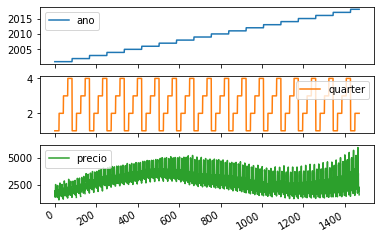

In [2]:
import pandas as pd

venta = pd.read_csv('dat/venta-madrid-distritos.csv', index_col=False)
out = venta.plot(subplots=True)

En la documentación de [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) se indica cómo modificar los parámetros fundamentales del gráfico, como a continuación:

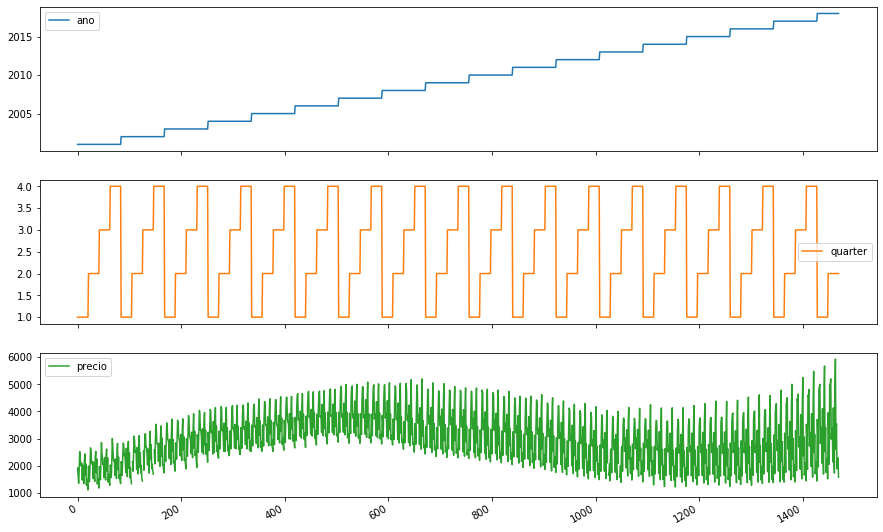

In [3]:
out = venta.plot(subplots=True, figsize = (15, 10))

Podemos pintar un gráfico especificando el tipo, el eje x y el eje y. Por ejemplo, para ver la evolución del precio a comienzo de cada año en un distrito concreto.

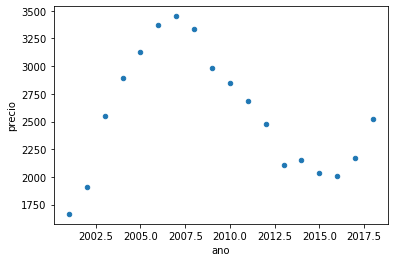

In [4]:
out = venta[(venta.distrito == 'San Blas') & (venta.quarter == 1)].plot(kind='scatter', x='ano', y='precio')

Un ejemplo pintando un histograma sobre una de las columnas:

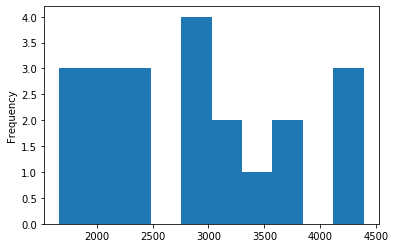

In [5]:
out = venta[(venta.ano == 2012) & (venta.quarter == 1)].precio.plot(kind='hist')

Para los histogramas y boxplots tenemos una interfaz más avanzada que podemos usar:

* [`boxplot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)
* [`hist`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)

Por ejemplo, para pintar los boxplots de precios por distrito.

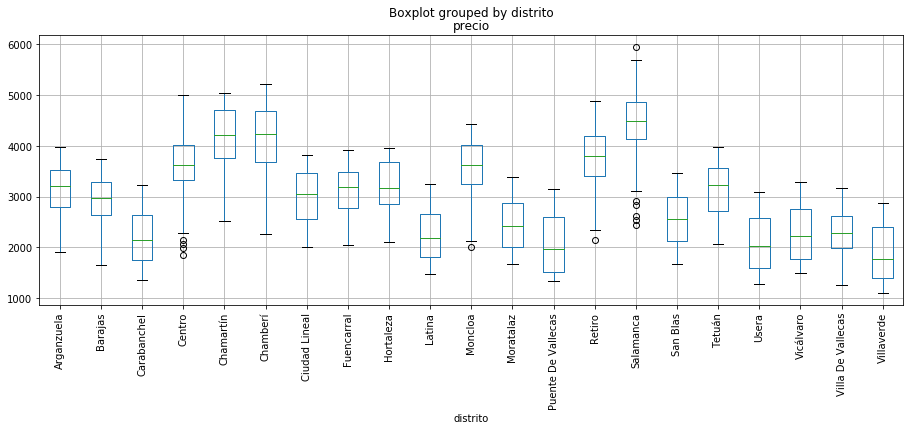

In [7]:
out = venta.boxplot('precio', by='distrito', figsize=(15, 5), rot=90)

## Seaborn

Un ejemplo de uso de seaborn, para pintar la evolución de precios a comienzo de cada año, usando una línea por distrito:

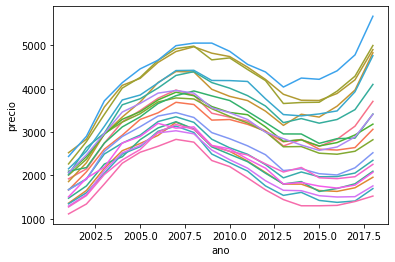

In [8]:
import seaborn as sns

out = sns.lineplot(data=venta[venta.quarter == 1],
                   x='ano', y='precio', hue='distrito',
                   legend=False)

Puedes consultar la documentación completa de seaborn [aquí](https://seaborn.pydata.org/). O un resumen de las funciones más importantes [aquí](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

## Bokeh

Podemos pintar el gráfico anterior con `Bokeh`:

In [9]:
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [10]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.palettes import viridis

data = venta[venta.quarter == 1].copy()

# La paleta de colores
distritos = data.distrito.unique()
color_palette = viridis(len(distritos))
color_map = dict(zip(distritos, color_palette))

# Configuración del gráfico: títulos y etiquetas
p = figure(title = 'Evolución precio de venta')
p.xaxis.axis_label = 'Año'
p.yaxis.axis_label = '€ metro cuadrado'

# Por cada distrito, una línea y su hover (popup al pasar el ratón por encima)
for distrito, group in data.groupby('distrito'):
    line = p.line(group.ano, group.precio, color=color_map[distrito], name=distrito)
    hover = HoverTool(tooltips=[('distrito', distrito),
                                ('año', '@x'),
                                ('precio', '@y{int}')],
                      renderers=[line], toggleable=False)
    p.add_tools(hover)

show(p)

## Dash

Dash es un framework para construir aplicaciones web de análisis de datos. Usa React con Plotly para el frontend, y Flask para el backend. Nos permite crear fácilmente dashboards complejos únicamente usando Python, sin necesidad de Javascript.

Necesita un servidor que corra la aplicación.

Para ver ejemplos y más información, consulta la [web de Dash](https://plot.ly/products/dash/)